# Import Required Libraries
Import necessary libraries, including gzip and numpy.

In [2]:
# Import necessary libraries
import gzip
import numpy as np
import matplotlib.pyplot as plt

# Load Data from Files
Load the cb513_sequence and cb513_testlabel data from the compressed numpy files using gzip.

In [3]:
# Load cb513 data from compressed numpy file
f = gzip.GzipFile('../Data/Original/cb513+profile_split1.npy.gz', "r")
cb513 = np.load(f)
f.close()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3136\2732464637.py:3: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  cb513 = np.load(f)


In [ ]:
print(cb513.shape)

(514, 39900)


In [ ]:
# convert all to 700 x 57
cb513_reshaped = cb513.reshape((514, 700, 57))
print(cb513_reshaped.shape)

(514, 700, 57)


In [ ]:
# visualize the reshaped data
print(cb513_reshaped[0])
print(cb513_reshaped[0].shape)

[[0.         0.         0.         ... 0.26894142 0.9234378  0.        ]
 [0.         0.         0.         ... 0.11920292 0.00919371 0.        ]
 [0.         0.         0.         ... 0.5        0.02508696 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
(700, 57)


In [ ]:
# for the first protein print separated features and labels
'''The 57 features are:
[0,22): amino acid residues, with the order of 'A', 'C', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'M', 'L', 'N', 'Q', 'P', 'S', 'R', 'T', 'W', 'V', 'Y', 'X', 'NoSeq'
[22,31): Secondary structure labels, with the sequence of 'L', 'B', 'E', 'G', 'I', 'H', 'S', 'T', 'NoSeq'
[31,33): N- and C- terminals;
[33,35): relative and absolute solvent accessibility, used only for training. (absolute accessibility is thresholded at 15; relative accessibility is normalized by the largest accessibility value in a protein and thresholded at 0.15; original solvent accessibility is computed by DSSP)
[35,57): sequence profile. Note the order of amino acid residues is ACDEFGHIKLMNPQRSTVWXY and it is different from the order for amino acid residues
'''
# first protein = p
p = cb513_reshaped[0]

In [ ]:
# crop the array for amino acid residues
aa_residues = p[:, 0:22]
print(aa_residues)
print(aa_residues.shape)
print(np.argmax(aa_residues, axis=1))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(700, 22)
[18 13 14 10  0 16  6 14 10  2 11 14 17 14  4 10 14  8 12  6 12 10  0 12
  4 11 11  4  6  5 15 16 13  6 18 10 18  3 11  8  4 11 15 18 12  6 16 11
 18 16 14  8 18 18 16 14 11  6 12 10 10 10 11 16 15 11  6 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 

In [ ]:
# crop the array for secondary structure labels
sec_structure = p[:, 22:31]
print(sec_structure)
print(sec_structure.shape)
print(np.argmax(sec_structure, axis=1))

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(700, 9)
[0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 7 7 7 7 2 2 2 2 2 2 2 2 0
 0 6 6 6 6 0 2 2 2 2 2 7 7 6 5 5 5 5 5 7 1 0 0 1 0 0 3 3 3 0 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8

In [ ]:
# crop the array for N- and C- terminals
terminals = p[:, 31:33]
print(terminals)
print(terminals.shape)
print(np.argmax(terminals, axis=1))

[[1. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(700, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
# crop the array for relative and absolute solvent accessibility
solvent_accessibility = p[:, 33:35]
print(solvent_accessibility)
print(solvent_accessibility.shape)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(700, 2)


In [ ]:
# crop the array for sequence profile
sequence_profile = p[:, 35:57]
print(sequence_profile)
print(sequence_profile.shape)
print(np.argmax(sequence_profile, axis=1))

[[0.21416502 0.17079548 0.02297737 ... 0.26894142 0.9234378  0.        ]
 [0.0831727  0.01045671 0.04228977 ... 0.11920292 0.00919371 0.        ]
 [0.34751054 0.0253327  0.9945137  ... 0.5        0.02508696 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
(700, 22)
[ 9 12  2 12  0 10  7 15  9  3 11 11 18  5  8  9 15  8 13  7 13 14  0 13
 15 11 13  5 17  4 12 11 12 17 13  9 13 11  3 11  5  3 12 18  7 17  2 11
 17  2  6 12 17 17 16 16 11  7  0  9 10  9 20 14  1 11  7 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 2

In [ ]:
# print the length of the protein ignoring the padding
length = len(np.where(np.argmax(aa_residues, axis=1) != 21)[0])
print(length)

67


In [ ]:
# crop the arrays for features and labels according to the length of the protein
features = p[:length, :]
print(features)
print(features.shape)

[[0.         0.         0.         ... 0.26894142 0.9234378  0.        ]
 [0.         0.         0.         ... 0.11920292 0.00919371 0.        ]
 [0.         0.         0.         ... 0.5        0.02508696 0.        ]
 ...
 [0.         0.         0.         ... 0.26894142 0.02209632 0.        ]
 [0.         0.         0.         ... 0.26894142 0.04352163 0.        ]
 [0.         0.         0.         ... 0.26894142 0.1693839  0.        ]]
(67, 57)


In [ ]:
aa_residues = features[:, 0:22]
print(aa_residues)
print(aa_residues.shape)
print(np.argmax(aa_residues, axis=1))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(67, 22)
[18 13 14 10  0 16  6 14 10  2 11 14 17 14  4 10 14  8 12  6 12 10  0 12
  4 11 11  4  6  5 15 16 13  6 18 10 18  3 11  8  4 11 15 18 12  6 16 11
 18 16 14  8 18 18 16 14 11  6 12 10 10 10 11 16 15 11  6]


In [ ]:
ss_labels = features[:, 22:31]
print(ss_labels)
print(ss_labels.shape)
print(np.argmax(ss_labels, axis=1))

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1.

In [ ]:
terminals = features[:, 31:33]
print(terminals)
print(terminals.shape)

[[1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]]
(67, 2)


In [ ]:
solvent_accessibility = features[:, 33:35]
print(solvent_accessibility)
print(solvent_accessibility.shape)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(67, 2)


In [ ]:
sequence_profile = features[:, 35:57]
print(sequence_profile)
print(sequence_profile.shape)
print(np.argmax(sequence_profile, axis=1))

[[0.21416502 0.17079548 0.02297737 ... 0.26894142 0.9234378  0.        ]
 [0.0831727  0.01045671 0.04228977 ... 0.11920292 0.00919371 0.        ]
 [0.34751054 0.0253327  0.9945137  ... 0.5        0.02508696 0.        ]
 ...
 [0.10065209 0.99991645 0.01852382 ... 0.26894142 0.02209632 0.        ]
 [0.14430313 0.03489141 0.54735762 ... 0.26894142 0.04352163 0.        ]
 [0.2042403  0.18542742 0.02711972 ... 0.26894142 0.1693839  0.        ]]
(67, 22)
[ 9 12  2 12  0 10  7 15  9  3 11 11 18  5  8  9 15  8 13  7 13 14  0 13
 15 11 13  5 17  4 12 11 12 17 13  9 13 11  3 11  5  3 12 18  7 17  2 11
 17  2  6 12 17 17 16 16 11  7  0  9 10  9 20 14  1 11  7]


In [ ]:
# Define the array of characters for amino acid residues
amino_acid_residues = [
    'A', 'C', 'E', 'D', 'G', 
    'F', 'I', 'H', 'K', 'M', 
    'L', 'N', 'Q', 'P', 'S', 
    'R', 'T', 'W', 'V', 'Y', 
    'X', '_'
]

# Define the array of characters for secondary structure labels
secondary_structure_labels = ['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T', '_']

# Define the array of characters for N- and C- terminals
terminals = ['N', 'C']

# Define the array of characters for sequence profile (ACDEF,GHIKL,MNPQR,STVWX,Y)
sequence_profile_residues = [
    'A', 'C', 'D', 'E', 'F',
    'G', 'H', 'I', 'K', 'L',
    'M', 'N', 'P', 'Q', 'R', 
    'S', 'T', 'V', 'W', 'X', 
    'Y', '_'
]

In [ ]:
# Function to convert one-hot encoded residue to string and clean trailing underscores
def residue_to_string(residue):
    index = np.argmax(residue[:22])
    residue_str = amino_acid_residues[index]
    return residue_str

# Function to convert one-hot encoded secondary structure to string
def secondary_structure_to_string(secondary_structure):
    index = np.argmax(secondary_structure[22:31])
    ss_str = secondary_structure_labels[index]
    return ss_str

# Function to convert one-hot encoded terminals to string
def terminals_to_string(terminals_one_hot):
    if np.array_equal(terminals_one_hot[31:33], [1, 0]):
        return 'N'
    elif np.array_equal(terminals_one_hot[31:33], [0, 1]):
        return 'C'
    else:
        return ''

# Function to convert solvent accessibility to string
def solvent_accessibility_to_string(solvent_accessibility):
    return f"Relative: {solvent_accessibility[33]}, Absolute: {solvent_accessibility[34]}"

# Function to convert sequence profile to string
def sequence_profile_to_string(sequence_profile):
    index = np.argmax(sequence_profile[35:57])
    seq_profile_str = sequence_profile_residues[index]
    return seq_profile_str

# Function to convert all features to string
def features_to_string(features):
    residue_str = residue_to_string(features)
    secondary_structure_str = secondary_structure_to_string(features)
    terminals_str = terminals_to_string(features)
    solvent_accessibility_str = solvent_accessibility_to_string(features)
    sequence_profile_str = sequence_profile_to_string(features)
    
    return f"Residue: {residue_str}\n" \
           f"Secondary Structure: {secondary_structure_str}\n" \
           f"Terminals: {terminals_str}\n" \
           f"Solvent Accessibility: {solvent_accessibility_str}\n" \
           f"Sequence Profile: {sequence_profile_str}"

# Example usage
# For the first amino acid residue of the first protein
features = cb513_reshaped[0][0]
print(features_to_string(features))

Residue: V
Secondary Structure: L
Terminals: N
Solvent Accessibility: Relative: 0.0, Absolute: 0.0
Sequence Profile: L


In [ ]:
# Function to convert one-hot encoded residue to string and clean trailing underscores
def residue_to_string(residue):
    indices = np.argmax(residue[:, :22], axis=-1)
    residue_str = ''.join([amino_acid_residues[i] for i in indices])
    residue_str = residue_str.rstrip('_')  # Remove trailing underscores
    return residue_str

# Function to convert one-hot encoded secondary structure to string
def secondary_structure_to_string(secondary_structure):
    indices = np.argmax(secondary_structure[:, 22:31], axis=-1)
    ss_str = ''.join([secondary_structure_labels[i] for i in indices])
    ss_str = ss_str.rstrip('_')  # Remove trailing underscores
    return ss_str

# Function to convert one-hot encoded terminals to string
def terminals_to_string(terminals_one_hot):
    terminals_str = ''
    for terminal in terminals_one_hot[:, 31:33]:
        if np.array_equal(terminal, [1, 0]):
            terminals_str += 'N'
        elif np.array_equal(terminal, [0, 1]):
            terminals_str += 'C'
        else:
            terminals_str += ''
    return terminals_str

# Function to convert solvent accessibility to string
def solvent_accessibility_to_string(solvent_accessibility):
    relative_accessibility = solvent_accessibility[:, 33]
    absolute_accessibility = solvent_accessibility[:, 34]
    return f"Relative: {relative_accessibility.tolist()}, Absolute: {absolute_accessibility.tolist()}"

# Function to convert sequence profile to string
def sequence_profile_to_string(sequence_profile):
    indices = np.argmax(sequence_profile[:, 35:57], axis=-1)
    seq_profile_str = ''.join([sequence_profile_residues[i] for i in indices])
    seq_profile_str = seq_profile_str.rstrip('_')  # Remove trailing underscores
    return seq_profile_str

# Function to convert all features to string
def features_to_string(features):
    residue_str = residue_to_string(features)
    secondary_structure_str = secondary_structure_to_string(features)
    terminals_str = terminals_to_string(features)
    solvent_accessibility_str = solvent_accessibility_to_string(features)
    sequence_profile_str = sequence_profile_to_string(features)
    
    return f"Residue: {residue_str}\n" \
           f"Secondary Structure: {secondary_structure_str}\n" \
           f"Terminals: {terminals_str}\n" \
           f"Solvent Accessibility: {solvent_accessibility_str}\n" \
           f"Sequence Profile: {sequence_profile_str}"

# Example usage for the first protein
features = cb513_reshaped[0]
print(features_to_string(features))

Residue: VPSLATISLENSWSGLSKQIQLAQGNNGIFRTPIVLVDNKGNRVQITNVTSKVVTSNIQLLLNTRNI
Secondary Structure: LLLHHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEELLSSSSLEEEEETTSHHHHHTBLLBLLGGGL
Terminals: NC
Solvent Accessibility: Relative: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

# Create CSV containing Residue and Secondary Structure

In [ ]:
import csv

# variable to store the preprocessed data
data = []

# loop through all proteins
for i in range(len(cb513_reshaped)):
    # crop the arrays for features and labels according to the length of the protein
    features = cb513_reshaped[i][:length, :]
    
    # convert the features to string
    residue_str = residue_to_string(features)
    secondary_structure_str = secondary_structure_to_string(features)
    
    # append the strings to the list
    data.append([residue_str, secondary_structure_str])

# write the data to a csv file
with open('cb513_preprocessed.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Residue', 'Secondary Structure'])
    writer.writerows(data)

# Load the preprocessed data from the csv file
with open('cb513_preprocessed.csv', mode='r') as file:
    reader = csv.reader(file)
    data = [row for row in reader]

# Print the first 5 rows of the data
print(data[:5])

In [ ]:
# Convert to 3-state Secondary Structure
# Secondary Structure: LLLHHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEELLSSSSLEEEEETTSHHHHHTBLLBLLGGGL
# Convert the original & predicted 8-state secondary structure to 3-state secondary structure
def convert_8state_to_3state(ss):
    ss_3state = ""
    for s in ss:
        if s in ['H', 'G', 'I']:
            ss_3state += 'H'
        elif s in ['E', 'B']:
            ss_3state += 'E'
        else:
            ss_3state += 'C'
    return ss_3state

# Example usage
ss = "LLLHHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEELLSSSSLEEEEETTSHHHHHTBLLBLLGGGL"
rs = "VPSLATISLENSWSGLSKQIQLAQGNNGIFRTPIVLVDNKGNRVQITNVTSKVVTSNIQLLLNTRNI"
ss_3state = convert_8state_to_3state(ss)
print(ss)
print(ss_3state)

LLLHHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEELLSSSSLEEEEETTSHHHHHTBLLBLLGGGL
CCCHHHHHHHHHHHHHHHHHHHHCCCCCEEEEEEEECCCCCCCEEEEECCCHHHHHCECCECCHHHC


(514, 700, 9)
(359800, 9)
[1.79200e+04 1.18100e+03 1.80160e+04 3.13200e+03 3.00000e+01 2.61570e+04
 8.31600e+03 1.00130e+04 2.75035e+05]


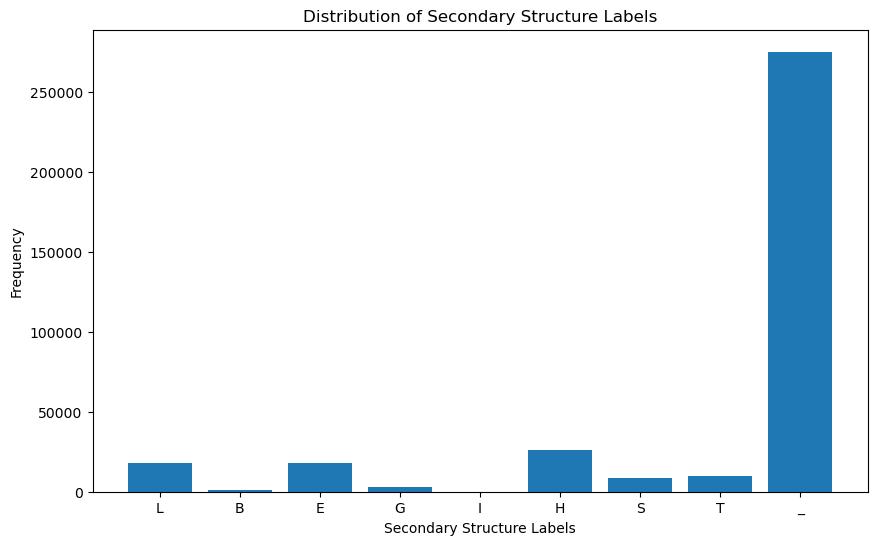

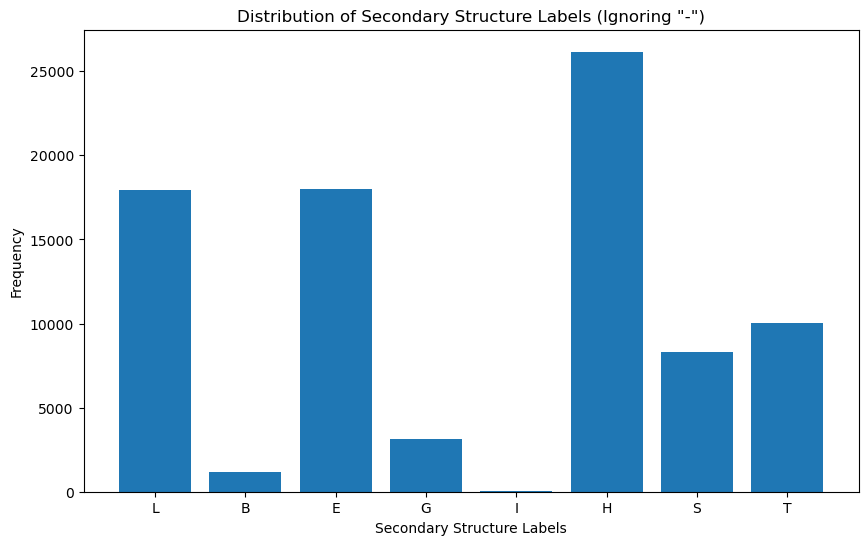

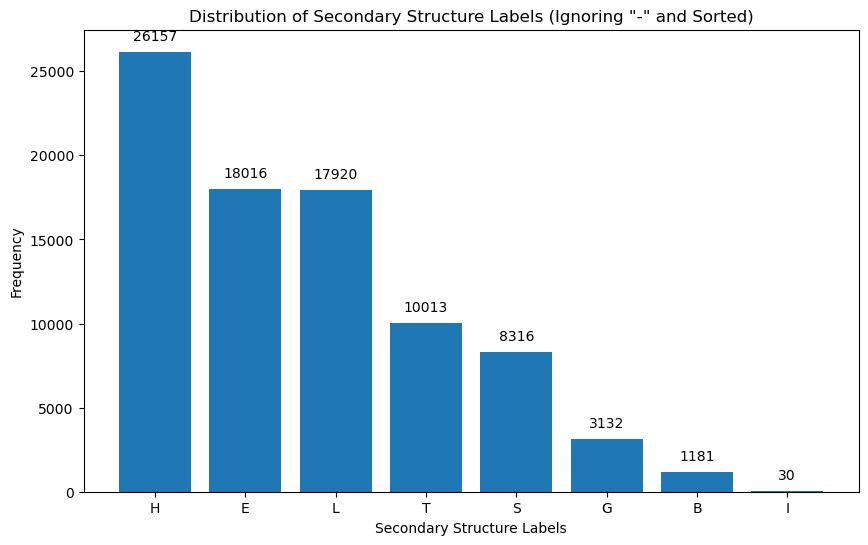

In [22]:
# Visualize the data distribution for secondary structure labels

# Get the secondary structure labels for all proteins
ss_labels = cb513_reshaped[:, :, 22:31]
print(ss_labels.shape)

# Flatten the labels
ss_labels = ss_labels.reshape((-1, 9))
print(ss_labels.shape)

# Count the frequency of each secondary structure label
label_counts = np.sum(ss_labels, axis=0)
print(label_counts)

# Plot the distribution of secondary structure labels
plt.figure(figsize=(10, 6))
plt.bar(secondary_structure_labels, label_counts)
plt.xlabel('Secondary Structure Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Secondary Structure Labels')
plt.show()

# Plot the distribution of secondary structure labels ignoring the '-' label
plt.figure(figsize=(10, 6))
plt.bar(secondary_structure_labels[:-1], label_counts[:-1])
plt.xlabel('Secondary Structure Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Secondary Structure Labels (Ignoring "-")')
plt.show()

# Plot the distribution of secondary structure labels ignoring the '-' and sort by frequency
sorted_indices = np.argsort(label_counts[:-1])[::-1]
sorted_labels = np.array(secondary_structure_labels[:-1])[sorted_indices]
sorted_counts = label_counts[:-1][sorted_indices]

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_labels, sorted_counts)
plt.xlabel('Secondary Structure Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Secondary Structure Labels (Ignoring "-" and Sorted)')

# Add the number of frequency (rounded) on top of the bars
for bar, count in zip(bars, sorted_counts):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, int(round(count)), ha='center', va='bottom')

plt.show()